# Results of TSD, DANN, SCADANN models across 10 days of inward rotation starting at Day_0~3 for Subject_4

Library used can be downloaded from https://github.com/aonai/long_term_EMG_myo   
&emsp; Original by UlysseCoteAllard https://github.com/UlysseCoteAllard/LongTermEMG   
Dataset recorded by https://github.com/Suguru55/Wearable_Sensor_Long-term_sEMG_Dataset   
Extended robot project can be found in https://github.com/aonai/myo_robot_arm

### Notes
* weights for TSD are total of 50 training models, 10 for each day
* weights for DANN and SCADANN are total of 45 trianing models, 9 for each day


* training examples should have shape (1, 7,)
* first session has shape (16, 572, 252)
* the following sessions have shape (4, 572, 252)
* training labels should have shape (1, 7,)


* location 0, 1, and 2 corresponds to neutral position, inward rotation, and outward rotation respectively
* session mentioned below are days, so number of sessions is 10



In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd 

In [2]:
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
os.chdir(code_dir)
from PrepareAndLoadData.process_data import read_data_training

# 0. Prepare Data
use `switch=2` to train across days and individually on wearing location 0 (`session_in_include=[0]`)

### specify the directories used for running the code:
* `code_diar`: path to long_term_EMG_myo library
* `data_dir`: where raw dataset is loaded; raw data is in csv format
* `processed_data_dir`: where processed dataset is loaded; processed data is in npy pickle format
    * processed data should be a ndarray of shape   
    (controlling_factor_1 x controlling_factor_2 x num_sessions_per_gesture x #examples_window*#mov(26*22=572) x processed_channel_shape(252 for TSD, (4,8,10) for ConvNet)
* `path_<model_name>`: where model weights are saved
    * weights should be saved in folder `/Weights/<model_name>`. Each folder has subfolders containing weights for the first controlling factor.
    * weights for base model (TSD or ConvNet) contain m set of training model
    * weights for DANN and SCADANN contain m-1 set of trianing model (these models are trianed based on TSD, so they do not have a best_state_0.pt model). 
* `save_<model_name>`: where model results are saved
    * each result for testing a model on a group of dataset is saved in folder `results`. Each result has corresponding 
        * `<model_name>.txt` includes predictions, ground truths, array of accuracies for each participant and each session, and overall accuracy
        * `predictions_<model_name>.npy` includes array of accuracies, ground truths, predictions, and model outputs (probability array for each prediction)
        * remember to make blank files in these names before saving



* use `read_data_training` to process raw dataset
        

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_all_across_day_loc_1_lump4"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

path_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump4/TSD"
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump4/DANN"
save_DANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump4/SCADANN"
save_SCADANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

In [4]:
# read_data_training(path=data_dir, store_path = processed_data_dir,  
#                    sessions_to_include =[1], switch=2, include_in_first=4,
#                    start_at_participant=5, num_participant=1)

Loading and preparing Training datasets...
session  1  --- process data in days  [2, 5, 6, 16, 17, 18, 22, 24, 25, 28]
index_participant_list  [5]
READ  Sub 5 _Loc 1 _Day 2
examples_per_session =  (1, 4, 572, 252)
READ  Sub 5 _Loc 1 _Day 5
Include day  5  in first dataset  (4, 572, 252)
examples of first session =  (8, 572, 252)
examples_per_session =  (1, 8, 572, 252)
READ  Sub 5 _Loc 1 _Day 6
Include day  6  in first dataset  (8, 572, 252)
examples of first session =  (12, 572, 252)
examples_per_session =  (1, 12, 572, 252)
READ  Sub 5 _Loc 1 _Day 16
Include day  16  in first dataset  (12, 572, 252)
examples of first session =  (16, 572, 252)
examples_per_session =  (1, 16, 572, 252)
READ  Sub 5 _Loc 1 _Day 17


/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


examples_per_session =  (2,)
READ  Sub 5 _Loc 1 _Day 18
examples_per_session =  (3,)
READ  Sub 5 _Loc 1 _Day 22
examples_per_session =  (4,)
READ  Sub 5 _Loc 1 _Day 24
examples_per_session =  (5,)
READ  Sub 5 _Loc 1 _Day 25
examples_per_session =  (6,)
READ  Sub 5 _Loc 1 _Day 28
examples_per_session =  (7,)
@ traning sessions =  (1, 7)
traning examples  (1, 7)
traning labels  (1, 7)
all traning examples  (1, 7)
all traning labels  (1, 7)


In [5]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 7)
traning labels  (1, 7)


In [6]:
for idx, examples_per_session in enumerate (examples_datasets_train[0]):
    print(idx, " examples_per_session = ", np.shape(examples_per_session))
    print(idx, " labels_per_session = ", np.shape(labels_datasets_train[0][idx]))

0  examples_per_session =  (16, 572, 252)
0  labels_per_session =  (16, 572)
1  examples_per_session =  (4, 572, 252)
1  labels_per_session =  (4, 572)
2  examples_per_session =  (4, 572, 252)
2  labels_per_session =  (4, 572)
3  examples_per_session =  (4, 572, 252)
3  labels_per_session =  (4, 572)
4  examples_per_session =  (4, 572, 252)
4  labels_per_session =  (4, 572)
5  examples_per_session =  (4, 572, 252)
5  labels_per_session =  (4, 572)
6  examples_per_session =  (4, 572, 252)
6  labels_per_session =  (4, 572)


### Specify params used for training and testing

During training and testing, processed datasets are first put into pytorch dataloders, then feed to the model trainer; following are params for TSD model and dataloaders

* `num_kernels`: list of integers defining number of neurons used in each linear layer (linear block has `dropout`=0.5)
* `number_of_cycles_total`: number of trails performed for each session (assuming that all session have the same trail size)
    * 4 for myo across day training
* `number_of_classes`: total number of gestures performed in dataset
    * 22 for myo
* `batch_size`: number of examples stored in each batch
* `feature_vector_input_length`: length of input array or each processed signal; i.e. size of one training example 
    * 252 for TSD
* `learning_rate`= 0.002515
    

In [7]:
num_kernels=[200, 200, 200]                                
number_of_cycle_for_first_training = np.shape(examples_datasets_train[0][0])[0]               
number_of_cycles_total=np.shape(examples_datasets_train[-1][-1])[0]               
print("number_of_cycle_for_first_training ", number_of_cycle_for_first_training)
print("number_of_cycles_total ", number_of_cycles_total)
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     
learning_rate=0.002515

number_of_cycle_for_first_training  16
number_of_cycles_total  4


# 1. TSD_DNN
* `train_fine_tuning`: used to train data using a base model (TSD or ConvNet)
    * running this function will save num_sessions sets of TSD model weights (each is fine tuned based on the previous training)  
    
* `test_standard_model_on_training_sessions`: test model result


### check if dataloaders are loaded correctly:
* each participant has shape (num_session x 40 x 572 x 252)
* each session has shape (40 x 572 x 252)
* put these data into on group ends up with shape (40*572=22880, 252)
    * shuffle on group of data and put into dataloaders
    * each participant should have num_sessions sets of dataloaders, each correspond to one session
   

In [8]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_standard_model_on_training_sessions, train_fine_tuning

In [9]:
# train_fine_tuning(examples_datasets_train, labels_datasets_train,
#                   num_kernels=num_kernels, path_weight_to_save_to=path_TSD,
#                   number_of_classes=number_of_classes, 
#                   number_of_cycles_total=number_of_cycles_total,
#                   number_of_cycle_for_first_training = number_of_cycle_for_first_training,
#                   batch_size=batch_size,
#                   feature_vector_input_length=feature_vector_input_length,
#                   learning_rate=learning_rate)

GET one participant_examples  (7,)
   GET one training_index_examples  (16, 572, 252)  at  0
   GOT one group XY  (9152, 252)    (9152,)
       one group XY test  (0,)    (0,)
       one group XY train (8236, 252)    (8236,)
       one group XY valid (916, 252)    (916, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   G

train Loss: 0.00274436 Acc: 0.87695312
val Loss: 0.00130381 Acc: 0.88209607
Epoch 2 of 500 took 0.110s
Epoch 2/499
----------
train Loss: 0.00228437 Acc: 0.8984375
val Loss: 0.00074150 Acc: 0.94323144
New best validation loss: 0.0007415017576717394
Epoch 3 of 500 took 0.107s
Epoch 3/499
----------
train Loss: 0.00226591 Acc: 0.90283203
val Loss: 0.00100911 Acc: 0.91703057
Epoch 4 of 500 took 0.108s
Epoch 4/499
----------
train Loss: 0.00188319 Acc: 0.91552734
val Loss: 0.00060188 Acc: 0.95196507
New best validation loss: 0.0006018760553093456
Epoch 5 of 500 took 0.107s
Epoch 5/499
----------
train Loss: 0.00184244 Acc: 0.91992188
val Loss: 0.00076001 Acc: 0.94323144
Epoch 6 of 500 took 0.108s
Epoch 6/499
----------
train Loss: 0.00170199 Acc: 0.92822266
val Loss: 0.00079851 Acc: 0.930131
Epoch 7 of 500 took 0.106s
Epoch 7/499
----------
train Loss: 0.00159528 Acc: 0.93066406
val Loss: 0.00087858 Acc: 0.92576419
Epoch 8 of 500 took 0.118s
Epoch 8/499
----------
train Loss: 0.00150945 Ac

train Loss: 0.00167655 Acc: 0.91992188
val Loss: 0.00049886 Acc: 0.96069869
New best validation loss: 0.0004988553807725031
Epoch 14 of 500 took 0.117s
Epoch 14/499
----------
train Loss: 0.00169952 Acc: 0.92333984
val Loss: 0.00051025 Acc: 0.9650655
Epoch 15 of 500 took 0.105s
Epoch 15/499
----------
train Loss: 0.00174926 Acc: 0.91601562
val Loss: 0.00043434 Acc: 0.96069869
Epoch 16 of 500 took 0.109s
Epoch 16/499
----------
train Loss: 0.00165600 Acc: 0.91796875
val Loss: 0.00057041 Acc: 0.95196507
Epoch 17 of 500 took 0.105s
Epoch 17/499
----------
train Loss: 0.00149264 Acc: 0.92675781
val Loss: 0.00050314 Acc: 0.94759825
Epoch 18 of 500 took 0.109s
Epoch 18/499
----------
train Loss: 0.00142636 Acc: 0.92919922
val Loss: 0.00075427 Acc: 0.94323144
Epoch 19 of 500 took 0.106s
Epoch 19/499
----------
train Loss: 0.00148290 Acc: 0.93115234
val Loss: 0.00045387 Acc: 0.95196507
Epoch 20 of 500 took 0.109s
Epoch 20/499
----------
train Loss: 0.00157963 Acc: 0.92675781
val Loss: 0.000618

train Loss: 0.00235713 Acc: 0.89111328
val Loss: 0.00058866 Acc: 0.95196507
New best validation loss: 0.0005886613932238916
Epoch 4 of 500 took 0.110s
Epoch 4/499
----------
train Loss: 0.00198372 Acc: 0.90283203
val Loss: 0.00052304 Acc: 0.96069869
Epoch 5 of 500 took 0.110s
Epoch 5/499
----------
train Loss: 0.00192419 Acc: 0.91357422
val Loss: 0.00048069 Acc: 0.95633188
New best validation loss: 0.00048068631033709996
Epoch 6 of 500 took 0.111s
Epoch 6/499
----------
train Loss: 0.00200203 Acc: 0.90576172
val Loss: 0.00067977 Acc: 0.93449782
Epoch 7 of 500 took 0.106s
Epoch 7/499
----------
train Loss: 0.00179858 Acc: 0.91845703
val Loss: 0.00081746 Acc: 0.90829694
Epoch 8 of 500 took 0.111s
Epoch 8/499
----------
train Loss: 0.00178627 Acc: 0.92236328
val Loss: 0.00051438 Acc: 0.95196507
Epoch 9 of 500 took 0.107s
Epoch 9/499
----------
train Loss: 0.00170822 Acc: 0.92138672
val Loss: 0.00055183 Acc: 0.94759825
Epoch 10 of 500 took 0.109s
Epoch 10/499
----------
train Loss: 0.00158

In [10]:
algo_name = "standard_TSD"
test_standard_model_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_TSD,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_TSD, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (7,)
   GET one training_index_examples  (16, 572, 252)  at  0
   GOT one group XY  (9152, 252)    (9152,)
       one group XY test  (2288, 252)    (2288, 252)
       one group XY train (8236, 252)    (8236,)
       one group XY valid (916, 252)    (916, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
     

In [11]:
results_filename = save_TSD + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
index_participant_list = ['0~3', 4, 5, 6, 7, 8, 9]
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
TSD_df

,Participant_5
Day_0~3,0.902098
Day_4,0.854895
Day_5,0.777972
Day_6,0.755245
Day_7,0.582168
Day_8,0.568182
Day_9,0.557692


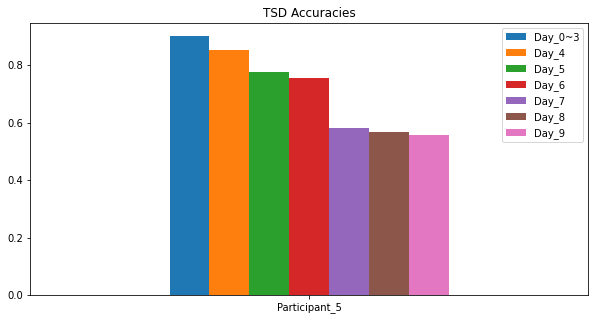

In [12]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

In [13]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [14]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Loc1_Sub"
n_name = "Day0~3->"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 7)
predictions =  (1, 7)
index_participant_list  ['0~3', 4, 5, 6, 7, 8, 9]
accuracies_gestures =  (22, 7)


,Unnamed: 0,Loc1_Sub5_Day0~3->0~3,Loc1_Sub5_Day0~3->4,Loc1_Sub5_Day0~3->5,Loc1_Sub5_Day0~3->6,Loc1_Sub5_Day0~3->7,Loc1_Sub5_Day0~3->8,Loc1_Sub5_Day0~3->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.961538,0.923077,1.000000,0.807692,0.576923,0.615385,0.769231
2,M2,0.923077,1.000000,0.538462,0.692308,0.576923,0.653846,0.615385
3,M3,0.942308,0.884615,0.884615,0.653846,0.000000,0.115385,0.000000
4,M4,0.788462,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000
5,M5,1.000000,0.653846,0.730769,1.000000,0.346154,0.923077,0.576923
6,M6,0.980769,0.846154,0.384615,0.461538,0.192308,0.153846,0.615385
7,M7,0.971154,1.000000,0.846154,1.000000,0.961538,0.730769,0.846154
8,M8,0.942308,1.000000,1.000000,1.000000,0.730769,0.730769,0.423077
9,M9,0.875000,0.807692,0.615385,0.923077,0.692308,0.807692,0.538462


# 2. DANN
* `train_DANN`: train DANN model using the first set of training weights from base model
    * num_sessions-1 sets of training weights will be saved
* `test_DANN_on_training_sessions`: test DANN model

In [15]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [16]:
# train_DANN(examples_datasets_train, labels_datasets_train, 
#           num_kernels=num_kernels,
#           path_weights_fine_tuning=path_TSD,
#           number_of_classes=number_of_classes,
#           number_of_cycles_total = number_of_cycles_total,
#           number_of_cycle_for_first_training = number_of_cycle_for_first_training,
#           batch_size=batch_size,
#           feature_vector_input_length=feature_vector_input_length,
#           path_weights_to_save_to=path_DANN, learning_rate=learning_rate)

GET one participant_examples  (7,)
   GET one training_index_examples  (16, 572, 252)  at  0
   GOT one group XY  (9152, 252)    (9152,)
       one group XY test  (0,)    (0,)
       one group XY train (8236, 252)    (8236,)
       one group XY valid (916, 252)    (916, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   G

Accuracy source 0.902832, main loss classifier 0.216831, source classification loss 0.298738, loss domain distinction 0.180297, accuracy domain distinction 0.500000
VALIDATION Loss: 0.25356966 Acc: 0.91157205
Epoch 24 of 500 took 0.239s
Accuracy source 0.900391, main loss classifier 0.216901, source classification loss 0.299097, loss domain distinction 0.180249, accuracy domain distinction 0.500000
VALIDATION Loss: 0.20968983 Acc: 0.9268559
New best validation loss:  0.20968982577323914
Epoch 25 of 500 took 0.236s
Accuracy source 0.877930, main loss classifier 0.239814, source classification loss 0.344222, loss domain distinction 0.182970, accuracy domain distinction 0.500000
VALIDATION Loss: 0.24298152 Acc: 0.91484716
Epoch 26 of 500 took 0.234s
Accuracy source 0.882812, main loss classifier 0.228190, source classification loss 0.320998, loss domain distinction 0.181584, accuracy domain distinction 0.500000
VALIDATION Loss: 0.21509655 Acc: 0.91921397
Epoch 27 of 500 took 0.233s
Accura

Accuracy source 0.895020, main loss classifier 0.224241, source classification loss 0.313114, loss domain distinction 0.182254, accuracy domain distinction 0.500000
VALIDATION Loss: 0.21621184 Acc: 0.91812227
New best validation loss:  0.21621184051036835
Epoch 20 of 500 took 0.235s
Accuracy source 0.883301, main loss classifier 0.232545, source classification loss 0.328937, loss domain distinction 0.183650, accuracy domain distinction 0.500000
VALIDATION Loss: 0.21823618 Acc: 0.91921397
Epoch 21 of 500 took 0.235s
Accuracy source 0.896484, main loss classifier 0.223294, source classification loss 0.310689, loss domain distinction 0.182511, accuracy domain distinction 0.500000
VALIDATION Loss: 0.23975188 Acc: 0.91703057
Epoch 22 of 500 took 0.232s
Accuracy source 0.896973, main loss classifier 0.214810, source classification loss 0.294075, loss domain distinction 0.182109, accuracy domain distinction 0.500000
VALIDATION Loss: 0.24167511 Acc: 0.90502183
Epoch 23 of 500 took 0.234s
Accur

Accuracy source 0.879883, main loss classifier 0.236503, source classification loss 0.337756, loss domain distinction 0.181456, accuracy domain distinction 0.500000
VALIDATION Loss: 0.34048954 Acc: 0.87554585
Epoch 14 of 500 took 0.233s
Accuracy source 0.885742, main loss classifier 0.225571, source classification loss 0.315392, loss domain distinction 0.182924, accuracy domain distinction 0.500000
VALIDATION Loss: 0.30424255 Acc: 0.87772926
Epoch 15 of 500 took 0.234s
Accuracy source 0.891602, main loss classifier 0.218309, source classification loss 0.301323, loss domain distinction 0.180670, accuracy domain distinction 0.500000
VALIDATION Loss: 0.27768800 Acc: 0.8919214
New best validation loss:  0.27768799662590027
Epoch 16 of 500 took 0.235s
Accuracy source 0.896973, main loss classifier 0.216492, source classification loss 0.297376, loss domain distinction 0.180431, accuracy domain distinction 0.500000
VALIDATION Loss: 0.25806120 Acc: 0.90393013
New best validation loss:  0.25806

Accuracy source 0.887207, main loss classifier 0.228274, source classification loss 0.321077, loss domain distinction 0.179640, accuracy domain distinction 0.500000
VALIDATION Loss: 0.34012339 Acc: 0.87445415
Epoch 16 of 500 took 0.238s
Accuracy source 0.877441, main loss classifier 0.241265, source classification loss 0.348016, loss domain distinction 0.180014, accuracy domain distinction 0.500000
VALIDATION Loss: 0.36722666 Acc: 0.87117904
Epoch 17 of 500 took 0.235s
Accuracy source 0.884277, main loss classifier 0.237195, source classification loss 0.339157, loss domain distinction 0.182213, accuracy domain distinction 0.500000
VALIDATION Loss: 0.39937311 Acc: 0.8558952
Epoch 18 of 500 took 0.234s
Accuracy source 0.892090, main loss classifier 0.228607, source classification loss 0.321994, loss domain distinction 0.181315, accuracy domain distinction 0.500000
VALIDATION Loss: 0.39240536 Acc: 0.8580786
Epoch 19 of 500 took 0.235s
Accuracy source 0.889160, main loss classifier 0.22818

Accuracy source 0.883301, main loss classifier 0.234514, source classification loss 0.334721, loss domain distinction 0.179193, accuracy domain distinction 0.500000
VALIDATION Loss: 0.35044509 Acc: 0.86462882
Epoch 23 of 500 took 0.275s
Accuracy source 0.878418, main loss classifier 0.228943, source classification loss 0.323485, loss domain distinction 0.180072, accuracy domain distinction 0.500000
VALIDATION Loss: 0.25439516 Acc: 0.8930131
New best validation loss:  0.25439515709877014
Epoch 24 of 500 took 0.247s
Accuracy source 0.890137, main loss classifier 0.225407, source classification loss 0.316364, loss domain distinction 0.180770, accuracy domain distinction 0.500000
VALIDATION Loss: 0.26193723 Acc: 0.89519651
Epoch 25 of 500 took 0.235s
Accuracy source 0.887695, main loss classifier 0.229828, source classification loss 0.324701, loss domain distinction 0.181072, accuracy domain distinction 0.500000
VALIDATION Loss: 0.28688437 Acc: 0.88755459
Epoch 26 of 500 took 0.234s
Accura

Accuracy source 0.885254, main loss classifier 0.235682, source classification loss 0.335806, loss domain distinction 0.182261, accuracy domain distinction 0.500000
VALIDATION Loss: 0.26423252 Acc: 0.89956332
Epoch 20 of 500 took 0.240s
Accuracy source 0.886230, main loss classifier 0.229533, source classification loss 0.324389, loss domain distinction 0.182012, accuracy domain distinction 0.500000
VALIDATION Loss: 0.26661032 Acc: 0.8941048
Epoch 21 of 500 took 0.233s
Accuracy source 0.893555, main loss classifier 0.222476, source classification loss 0.309850, loss domain distinction 0.181176, accuracy domain distinction 0.500000
VALIDATION Loss: 0.30449620 Acc: 0.88318777
Epoch 22 of 500 took 0.234s
Accuracy source 0.888184, main loss classifier 0.224504, source classification loss 0.313847, loss domain distinction 0.180455, accuracy domain distinction 0.500000
VALIDATION Loss: 0.30120391 Acc: 0.88100437
Epoch 23 of 500 took 0.233s
Accuracy source 0.900879, main loss classifier 0.2164

In [17]:
algo_name = "DANN"
test_DANN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                              feature_vector_input_length=feature_vector_input_length,
                              num_neurons=num_kernels, path_weights_DA=path_DANN,
                              algo_name=algo_name, save_path = save_DANN, 
                              number_of_cycles_total=number_of_cycles_total,
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              path_weights_normal=path_TSD, number_of_classes=number_of_classes,
                              cycle_for_test=3)

GET one participant_examples  (7,)
   GET one training_index_examples  (16, 572, 252)  at  0
   GOT one group XY  (9152, 252)    (9152,)
       one group XY test  (2288, 252)    (2288, 252)
       one group XY train (8236, 252)    (8236,)
       one group XY valid (916, 252)    (916, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
     

In [18]:
results_filename = save_DANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
DANN_acc = results[0]
DANN_acc_overall = np.mean(DANN_acc)
DANN_df = pd.DataFrame(DANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
DANN_df

,Participant_5
Day_0~3,0.902098
Day_4,0.875874
Day_5,0.846154
Day_6,0.833916
Day_7,0.716783
Day_8,0.711538
Day_9,0.657343


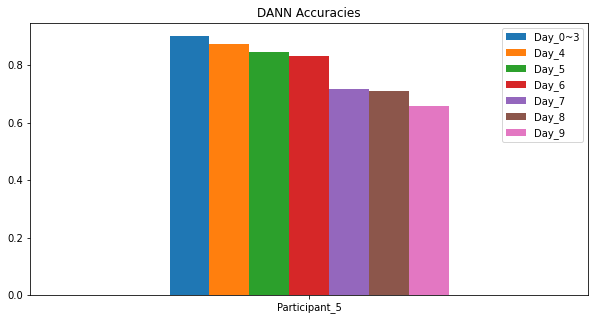

In [19]:
DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("DANN Accuracies")
plt.show()

In [20]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_DANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 7)
predictions =  (1, 7)
index_participant_list  ['0~3', 4, 5, 6, 7, 8, 9]
accuracies_gestures =  (22, 7)


,Unnamed: 0,Loc1_Sub5_Day0~3->0~3,Loc1_Sub5_Day0~3->4,Loc1_Sub5_Day0~3->5,Loc1_Sub5_Day0~3->6,Loc1_Sub5_Day0~3->7,Loc1_Sub5_Day0~3->8,Loc1_Sub5_Day0~3->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.961538,0.961538,1.000000,0.846154,0.653846,0.615385,0.884615
2,M2,0.923077,1.000000,0.500000,0.730769,0.615385,0.576923,0.615385
3,M3,0.942308,0.884615,1.000000,0.923077,0.538462,0.923077,0.346154
4,M4,0.788462,1.000000,0.576923,0.230769,0.038462,0.307692,0.000000
5,M5,1.000000,1.000000,1.000000,1.000000,0.538462,0.961538,0.730769
6,M6,0.980769,1.000000,0.730769,0.576923,0.692308,0.538462,1.000000
7,M7,0.971154,1.000000,0.961538,1.000000,0.884615,0.692308,0.769231
8,M8,0.942308,0.961538,1.000000,0.923077,0.807692,0.923077,0.692308
9,M9,0.875000,0.730769,0.653846,0.923077,0.653846,0.653846,0.269231


# 3. SCADANN

* `run_SCADANN_training_sessions`: train SCADANN model. The first session uses TSD model_0 wegits; others use DANN weights
    * specify `percentage_same_gesture_stable` based on the performance of most pseudo labels: 
        * print accuracies out and check what percentage will optimize `ACCURACY MODEL` and `ACCURACY PSEUDO` without cutting out too much data 
    * num_sessions-1 sets of training weights will be saved


In [21]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import \
    run_SCADANN_training_sessions, test_network_SCADANN

In [22]:
# percentage_same_gesture_stable = 0.75 
# run_SCADANN_training_sessions(examples_datasets=examples_datasets_train, labels_datasets=labels_datasets_train,
#                               num_kernels=num_kernels, feature_vector_input_length=feature_vector_input_length,
#                               path_weights_to_save_to=path_SCADANN,
#                               path_weights_Adversarial_training=path_DANN,
#                               path_weights_Normal_training=path_TSD,
#                               number_of_cycles_total = number_of_cycles_total, 
#                               number_of_cycle_for_first_training = number_of_cycle_for_first_training,
#                               number_of_classes=number_of_classes,
#                               learning_rate=learning_rate)

GET one participant_examples  (7,)
   GET one training_index_examples  (16, 572, 252)  at  0
   GOT one group XY  (9152, 252)    (9152,)
       one group XY test  (0,)    (0,)
       one group XY train (9152, 252)    (9152,)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  4
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Accuracy total 0.877103, main loss classifier 0.473170, source accuracy 0.878606 source classification loss 0.331184, target accuracy 0.875601 target loss 0.389597 accuracy domain distinction 0.500000 loss domain distinction 1.127796,
VALIDATION Loss: 0.16102915 Acc: 0.95486936
New best validation loss:  0.16102915044341767
Epoch 2 of 500 took 0.375s
Accuracy total 0.885216, main loss classifier 0.451355, source accuracy 0.894231 source classification loss 0.306788, target accuracy 0.876202 target loss 0.384776 accuracy domain distinction 0.500000 loss domain distinction 1.055736,
VALIDATION Loss: 0.16418226 Acc: 0.94061758
Epoch 3 of 500 took 0.342s
Accuracy total 0.882812, main loss classifier 0.452513, source accuracy 0.878606 source classification loss 0.349953, target accuracy 0.887019 target loss 0.346757 accuracy domain distinction 0.500000 loss domain distinction 1.041577,
VALIDATION Loss: 0.13997434 Acc: 0.95486936
New best validation loss:  0.13997434292520797
Epoch 4 of 500 

Accuracy total 0.899940, main loss classifier 0.399270, source accuracy 0.891226 source classification loss 0.324758, target accuracy 0.908654 target loss 0.266975 accuracy domain distinction 0.500000 loss domain distinction 1.034036,
VALIDATION Loss: 0.12280629 Acc: 0.95724466
Epoch 28 of 500 took 0.350s
Accuracy total 0.896935, main loss classifier 0.396549, source accuracy 0.887620 source classification loss 0.320513, target accuracy 0.906250 target loss 0.265082 accuracy domain distinction 0.500000 loss domain distinction 1.037512,
VALIDATION Loss: 0.10235185 Acc: 0.96437055
New best validation loss:  0.10235185229352542
Epoch 29 of 500 took 0.345s
Accuracy total 0.920373, main loss classifier 0.354993, source accuracy 0.914062 source classification loss 0.261589, target accuracy 0.926683 target loss 0.242596 accuracy domain distinction 0.500000 loss domain distinction 1.029009,
VALIDATION Loss: 0.12369751 Acc: 0.95961995
Epoch 30 of 500 took 0.343s
Accuracy total 0.907452, main lo

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.3076923076923077   AFTER:  0.0  len before:  26   len after:  17
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  8
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.69

Accuracy total 0.884375, main loss classifier 0.459715, source accuracy 0.883750 source classification loss 0.356240, target accuracy 0.885000 target loss 0.355106 accuracy domain distinction 0.500000 loss domain distinction 1.040424,
VALIDATION Loss: 0.15754411 Acc: 0.94348894
New best validation loss:  0.15754411263125284
Epoch 7 of 500 took 0.361s
Accuracy total 0.876563, main loss classifier 0.461708, source accuracy 0.871250 source classification loss 0.353589, target accuracy 0.881875 target loss 0.362455 accuracy domain distinction 0.500000 loss domain distinction 1.036862,
VALIDATION Loss: 0.17302247 Acc: 0.93366093
Epoch 8 of 500 took 0.331s
Accuracy total 0.885938, main loss classifier 0.437840, source accuracy 0.883125 source classification loss 0.345201, target accuracy 0.888750 target loss 0.322560 accuracy domain distinction 0.500000 loss domain distinction 1.039595,
VALIDATION Loss: 0.18418456 Acc: 0.92628993
Epoch 9 of 500 took 0.382s
Accuracy total 0.883125, main loss 

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.3076923076923077   AFTER:  0.0  len before:  26   len after:  17
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  8
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.69

STARTING TRAINING
Accuracy total 0.855313, main loss classifier 0.541084, source accuracy 0.855000 source classification loss 0.397094, target accuracy 0.855625 target loss 0.457818 accuracy domain distinction 0.500000 loss domain distinction 1.136281,
VALIDATION Loss: 0.30122627 Acc: 0.90147783
New best validation loss:  0.30122627317905426
Epoch 2 of 500 took 0.335s
Accuracy total 0.869062, main loss classifier 0.486682, source accuracy 0.878125 source classification loss 0.359899, target accuracy 0.860000 target loss 0.402001 accuracy domain distinction 0.500000 loss domain distinction 1.057323,
VALIDATION Loss: 0.24777134 Acc: 0.93103448
New best validation loss:  0.2477713397571019
Epoch 3 of 500 took 0.331s
Accuracy total 0.880000, main loss classifier 0.474173, source accuracy 0.876875 source classification loss 0.362599, target accuracy 0.883125 target loss 0.377699 accuracy domain distinction 0.500000 loss domain distinction 1.040240,
VALIDATION Loss: 0.22991141 Acc: 0.9261083

Accuracy total 0.906563, main loss classifier 0.395951, source accuracy 0.887500 source classification loss 0.330109, target accuracy 0.925625 target loss 0.256319 accuracy domain distinction 0.500000 loss domain distinction 1.027373,
VALIDATION Loss: 0.16230953 Acc: 0.94581281
Epoch 27 of 500 took 0.332s
Accuracy total 0.908125, main loss classifier 0.388030, source accuracy 0.891250 source classification loss 0.324947, target accuracy 0.925000 target loss 0.244313 accuracy domain distinction 0.500000 loss domain distinction 1.033991,
VALIDATION Loss: 0.21504525 Acc: 0.93842365
Epoch    27: reducing learning rate of group 0 to 2.0120e-05.
Epoch 28 of 500 took 0.366s
Accuracy total 0.903438, main loss classifier 0.400154, source accuracy 0.897500 source classification loss 0.331517, target accuracy 0.909375 target loss 0.263092 accuracy domain distinction 0.500000 loss domain distinction 1.028502,
VALIDATION Loss: 0.20608390 Acc: 0.93596059
Epoch 29 of 500 took 0.330s
Accuracy total 0.

BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  26
ACCURACY MODEL:  0.8754370629370629   Accuracy pseudo: 0.9600950118764846  len pseudo:  2105    len predictions 2288
HANDLING NEW SESSION  2
Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.3076923076923077   AFTER:  0.0  len before:  26   len after:  17
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  8
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  

BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.15384615384615385   AFTER:  0.0  len before:  26   len after:  12
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.46153846153846156   AFTER:  0.0  len before:  26   len after:  6
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  

STARTING TRAINING
Accuracy total 0.824929, main loss classifier 0.672508, source accuracy 0.862216 source classification loss 0.401190, target accuracy 0.787642 target loss 0.713835 accuracy domain distinction 0.500000 loss domain distinction 1.149958,
VALIDATION Loss: 0.34840690 Acc: 0.9048913
New best validation loss:  0.34840689847866696
Epoch 2 of 500 took 0.295s
Accuracy total 0.841619, main loss classifier 0.625489, source accuracy 0.860795 source classification loss 0.420337, target accuracy 0.822443 target loss 0.617457 accuracy domain distinction 0.500000 loss domain distinction 1.065920,
VALIDATION Loss: 0.28564647 Acc: 0.92663043
New best validation loss:  0.2856464708844821
Epoch 3 of 500 took 0.293s
Accuracy total 0.856889, main loss classifier 0.555869, source accuracy 0.884943 source classification loss 0.365599, target accuracy 0.828835 target loss 0.536745 accuracy domain distinction 0.500000 loss domain distinction 1.046972,
VALIDATION Loss: 0.28151293 Acc: 0.9076087


Accuracy total 0.882102, main loss classifier 0.462093, source accuracy 0.887074 source classification loss 0.362556, target accuracy 0.877131 target loss 0.355845 accuracy domain distinction 0.500000 loss domain distinction 1.028929,
VALIDATION Loss: 0.19896138 Acc: 0.94293478
Epoch 28 of 500 took 0.293s
Accuracy total 0.882457, main loss classifier 0.463802, source accuracy 0.872159 source classification loss 0.374930, target accuracy 0.892756 target loss 0.345792 accuracy domain distinction 0.500000 loss domain distinction 1.034406,
VALIDATION Loss: 0.18434013 Acc: 0.94836957
Epoch    28: reducing learning rate of group 0 to 2.0120e-05.
Epoch 29 of 500 took 0.295s
Accuracy total 0.885298, main loss classifier 0.441679, source accuracy 0.877131 source classification loss 0.364139, target accuracy 0.893466 target loss 0.312882 accuracy domain distinction 0.500000 loss domain distinction 1.031685,
VALIDATION Loss: 0.19114443 Acc: 0.94565217
Epoch 30 of 500 took 0.292s
Accuracy total 0.

BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  26
ACCURACY MODEL:  0.8754370629370629   Accuracy pseudo: 0.9600950118764846  len pseudo:  2105    len predictions 2288
HANDLING NEW SESSION  2
Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.3076923076923077   AFTER:  0.0  len before:  26   len after:  17
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  8
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  

BEFORE:  0.6538461538461539   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
ACCURACY MODEL:  0.7027972027972028   Accuracy pseudo: 0.8534858387799564  len pseudo:  1836    len predictions 2288
HANDLING NEW SESSION  5
Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6538461538461539  len before:  26   len after:  26
BEFORE:  0.4230769230769231   AFTER:  0.4230769230769231  len before:  26   len after:  26
BEFORE:  0.3076923076923077   AFTER:  0.38461538461538464  len before:  26   len after:  26
BEFORE:  0.07692307692307693   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.923076923076

Accuracy total 0.865489, main loss classifier 0.520510, source accuracy 0.860734 source classification loss 0.408716, target accuracy 0.870245 target loss 0.425278 accuracy domain distinction 0.500000 loss domain distinction 1.035124,
VALIDATION Loss: 0.23224241 Acc: 0.93700787
New best validation loss:  0.2322424128651619
Epoch 6 of 500 took 0.305s
Accuracy total 0.864470, main loss classifier 0.522003, source accuracy 0.848505 source classification loss 0.449114, target accuracy 0.880435 target loss 0.387739 accuracy domain distinction 0.500000 loss domain distinction 1.035762,
VALIDATION Loss: 0.21225858 Acc: 0.92650919
New best validation loss:  0.2122585823138555
Epoch 7 of 500 took 0.306s
Accuracy total 0.864470, main loss classifier 0.530743, source accuracy 0.858696 source classification loss 0.435206, target accuracy 0.870245 target loss 0.417976 accuracy domain distinction 0.500000 loss domain distinction 1.041519,
VALIDATION Loss: 0.24779855 Acc: 0.9160105
Epoch 8 of 500 too

Accuracy total 0.882133, main loss classifier 0.451599, source accuracy 0.867527 source classification loss 0.373661, target accuracy 0.896739 target loss 0.322247 accuracy domain distinction 0.500000 loss domain distinction 1.036452,
VALIDATION Loss: 0.20623416 Acc: 0.92913386
Epoch 32 of 500 took 0.305s
Accuracy total 0.891984, main loss classifier 0.421133, source accuracy 0.871603 source classification loss 0.356743, target accuracy 0.912364 target loss 0.279013 accuracy domain distinction 0.500000 loss domain distinction 1.032544,
VALIDATION Loss: 0.18127891 Acc: 0.94225722
New best validation loss:  0.1812789055208365
Epoch 33 of 500 took 0.313s
Accuracy total 0.893003, main loss classifier 0.431680, source accuracy 0.873641 source classification loss 0.380359, target accuracy 0.912364 target loss 0.276332 accuracy domain distinction 0.500000 loss domain distinction 1.033343,
VALIDATION Loss: 0.17887544 Acc: 0.93700787
New best validation loss:  0.17887543514370918
Epoch 34 of 50

ACCURACY MODEL:  0.8754370629370629   Accuracy pseudo: 0.9600950118764846  len pseudo:  2105    len predictions 2288
HANDLING NEW SESSION  2
Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.3076923076923077   AFTER:  0.0  len before:  26   len after:  17
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  8
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6923076923076

BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.038461538461538464   AFTER:  0.0  len before:  26   len after:  14
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.4230769230769231   AFTER:  0.0  len before:  26   len after:  8
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5   AFTER:  0.7058823529411765  len before:  26   len after:  17
BEFORE:  0.2692307692307692   AFTER:  0.0  len before:  26   len after:  1
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  2

Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.46153846153846156   AFTER:  0.6666666666666666  len before:  26   len after:  18
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.46153846153846156   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  1.0  len before:  26   len after:  5
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.46153846153846156   AFTER:  0.625  len before:  26   len after:  16
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  1.0  len before:  26   len after:  18
BEFORE:  0.3076923076923077   AFTER:  0.0  len before:  26   le

Accuracy total 0.840169, main loss classifier 0.606744, source accuracy 0.868490 source classification loss 0.414648, target accuracy 0.811849 target loss 0.591628 accuracy domain distinction 0.500000 loss domain distinction 1.036059,
VALIDATION Loss: 0.47746197 Acc: 0.87080103
Epoch 7 of 500 took 0.323s
Accuracy total 0.827799, main loss classifier 0.634405, source accuracy 0.846354 source classification loss 0.458374, target accuracy 0.809245 target loss 0.603529 accuracy domain distinction 0.500000 loss domain distinction 1.034540,
VALIDATION Loss: 0.37363949 Acc: 0.87338501
Epoch 8 of 500 took 0.320s
Accuracy total 0.839844, main loss classifier 0.594726, source accuracy 0.863281 source classification loss 0.395104, target accuracy 0.816406 target loss 0.587223 accuracy domain distinction 0.500000 loss domain distinction 1.035621,
VALIDATION Loss: 0.43068958 Acc: 0.88372093
Epoch 9 of 500 took 0.317s
Accuracy total 0.847656, main loss classifier 0.572658, source accuracy 0.870443 s

Accuracy total 0.865234, main loss classifier 0.517892, source accuracy 0.871094 source classification loss 0.383486, target accuracy 0.859375 target loss 0.445213 accuracy domain distinction 0.500000 loss domain distinction 1.035424,
VALIDATION Loss: 0.27787806 Acc: 0.89664083
Epoch 33 of 500 took 0.322s
Accuracy total 0.862630, main loss classifier 0.533411, source accuracy 0.867839 source classification loss 0.397485, target accuracy 0.857422 target loss 0.463260 accuracy domain distinction 0.500000 loss domain distinction 1.030386,
VALIDATION Loss: 0.34558134 Acc: 0.89405685
Epoch 34 of 500 took 0.320s
Accuracy total 0.861003, main loss classifier 0.518596, source accuracy 0.871094 source classification loss 0.380826, target accuracy 0.850911 target loss 0.450391 accuracy domain distinction 0.500000 loss domain distinction 1.029871,
VALIDATION Loss: 0.39474562 Acc: 0.88113695
Epoch 35 of 500 took 0.321s
Accuracy total 0.863281, main loss classifier 0.523250, source accuracy 0.87044

In [23]:
algo_name = "SCADANN"
test_network_SCADANN(examples_datasets_train=examples_datasets_train, labels_datasets_train=labels_datasets_train,
                     num_neurons=num_kernels, feature_vector_input_length=feature_vector_input_length,
                     path_weights_SCADANN =path_SCADANN, path_weights_normal=path_TSD,
                     algo_name=algo_name, cycle_test=3, number_of_cycles_total=number_of_cycles_total,
                     number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                     number_of_classes=number_of_classes, save_path = save_SCADANN)

GET one participant_examples  (7,)
   GET one training_index_examples  (16, 572, 252)  at  0
   GOT one group XY  (9152, 252)    (9152,)
       one group XY test  (2288, 252)    (2288, 252)
       one group XY train (8236, 252)    (8236,)
       one group XY valid (916, 252)    (916, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
     

In [24]:
results_filename = save_SCADANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
SCADANN_acc = results[0]
SCADANN_acc_overall = np.mean(SCADANN_acc)
SCADANN_df = pd.DataFrame(SCADANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
SCADANN_df

,Participant_5
Day_0~3,0.902098
Day_4,0.888112
Day_5,0.891608
Day_6,0.865385
Day_7,0.791958
Day_8,0.729021
Day_9,0.746503


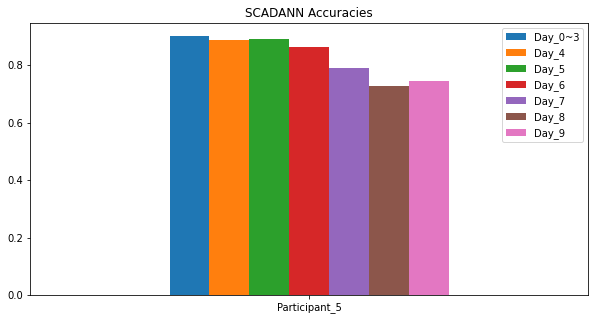

In [25]:
SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("SCADANN Accuracies")
plt.show()

In [26]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_SCADANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 7)
predictions =  (1, 7)
index_participant_list  ['0~3', 4, 5, 6, 7, 8, 9]
accuracies_gestures =  (22, 7)


,Unnamed: 0,Loc1_Sub5_Day0~3->0~3,Loc1_Sub5_Day0~3->4,Loc1_Sub5_Day0~3->5,Loc1_Sub5_Day0~3->6,Loc1_Sub5_Day0~3->7,Loc1_Sub5_Day0~3->8,Loc1_Sub5_Day0~3->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.961538,1.000000,1.000000,1.000000,0.692308,0.692308,0.884615
2,M2,0.923077,1.000000,0.538462,0.730769,0.692308,0.576923,0.692308
3,M3,0.942308,0.923077,1.000000,1.000000,0.538462,1.000000,0.192308
4,M4,0.788462,1.000000,0.269231,0.346154,0.038462,0.000000,0.000000
5,M5,1.000000,1.000000,1.000000,1.000000,0.538462,0.884615,0.923077
6,M6,0.980769,1.000000,1.000000,0.653846,1.000000,0.538462,1.000000
7,M7,0.971154,1.000000,0.923077,1.000000,1.000000,1.000000,1.000000
8,M8,0.942308,0.961538,1.000000,0.923077,1.000000,1.000000,0.846154
9,M9,0.875000,0.769231,0.692308,0.730769,0.615385,0.730769,0.461538


# Conclusion
Suppose there is a ndarray of NxM dataloaders, then N group of models will be trained, and each group will have M model. Each group is independent of the other, and each model within a group is dependent on its previous training weights.

In general, overall accuracies of SCADANN are better than DANN, and DANN is better than TSD.
Occasionally accuracies of SCADANN end up a little smaller than DANN, reasons may be lack of datasets put into training model (fixed) and non-optimal percentage_same_gesture_sable (fixed). Code should be reproducible if processed dataset sticks to the shape defined above.  

The amount of increase in accuracies from DANN to SCADANN looks random. But if the base model is better at classifying one session, then its corresponding SCADANN is also better at classifying the same session. Given such result, to obtain the best performance from SCADANN, a good model trained with good data should be the starting point.

* What to check if sth goes wrong:
    * percentage_same_gesture_sable
    * number of cycles or sessions
    * shape of dataloaders (combination of train, test, valid should include all dataset)
    * shape of procssed datasets
    * directory paths of weights and results
    * if weights are stored or loaded correcltyTSD_acc_overall_one = np.mean(TSD_acc, axis=0)

In [27]:
print("TSD")
display(TSD_df)
print("DANN")
display(DANN_df)
print("SCADANN")
display(SCADANN_df)

TSD


,Participant_5
Day_0~3,0.902098
Day_4,0.854895
Day_5,0.777972
Day_6,0.755245
Day_7,0.582168
Day_8,0.568182
Day_9,0.557692


DANN


,Participant_5
Day_0~3,0.902098
Day_4,0.875874
Day_5,0.846154
Day_6,0.833916
Day_7,0.716783
Day_8,0.711538
Day_9,0.657343


SCADANN


,Participant_5
Day_0~3,0.902098
Day_4,0.888112
Day_5,0.891608
Day_6,0.865385
Day_7,0.791958
Day_8,0.729021
Day_9,0.746503


In [28]:
diff_df = SCADANN_df-TSD_df
diff_df = diff_df.drop('Day_'+index_participant_list[0])
display(diff_df)
diff_df.to_csv(save_TSD+'/diff_results/across_day_loc1_lump4_diff.csv')

,Participant_5
Day_4,0.033217
Day_5,0.113636
Day_6,0.11014
Day_7,0.20979
Day_8,0.160839
Day_9,0.188811


In [29]:
overall_acc_df = pd.DataFrame([TSD_acc_overall, DANN_acc_overall, SCADANN_acc_overall],
                             index = ["TSD", "DANN", "SCADANN"],
                             columns = ["Overall_Acc"])
overall_acc_df

,Overall_Acc
TSD,0.714036
DANN,0.791958
SCADANN,0.830669


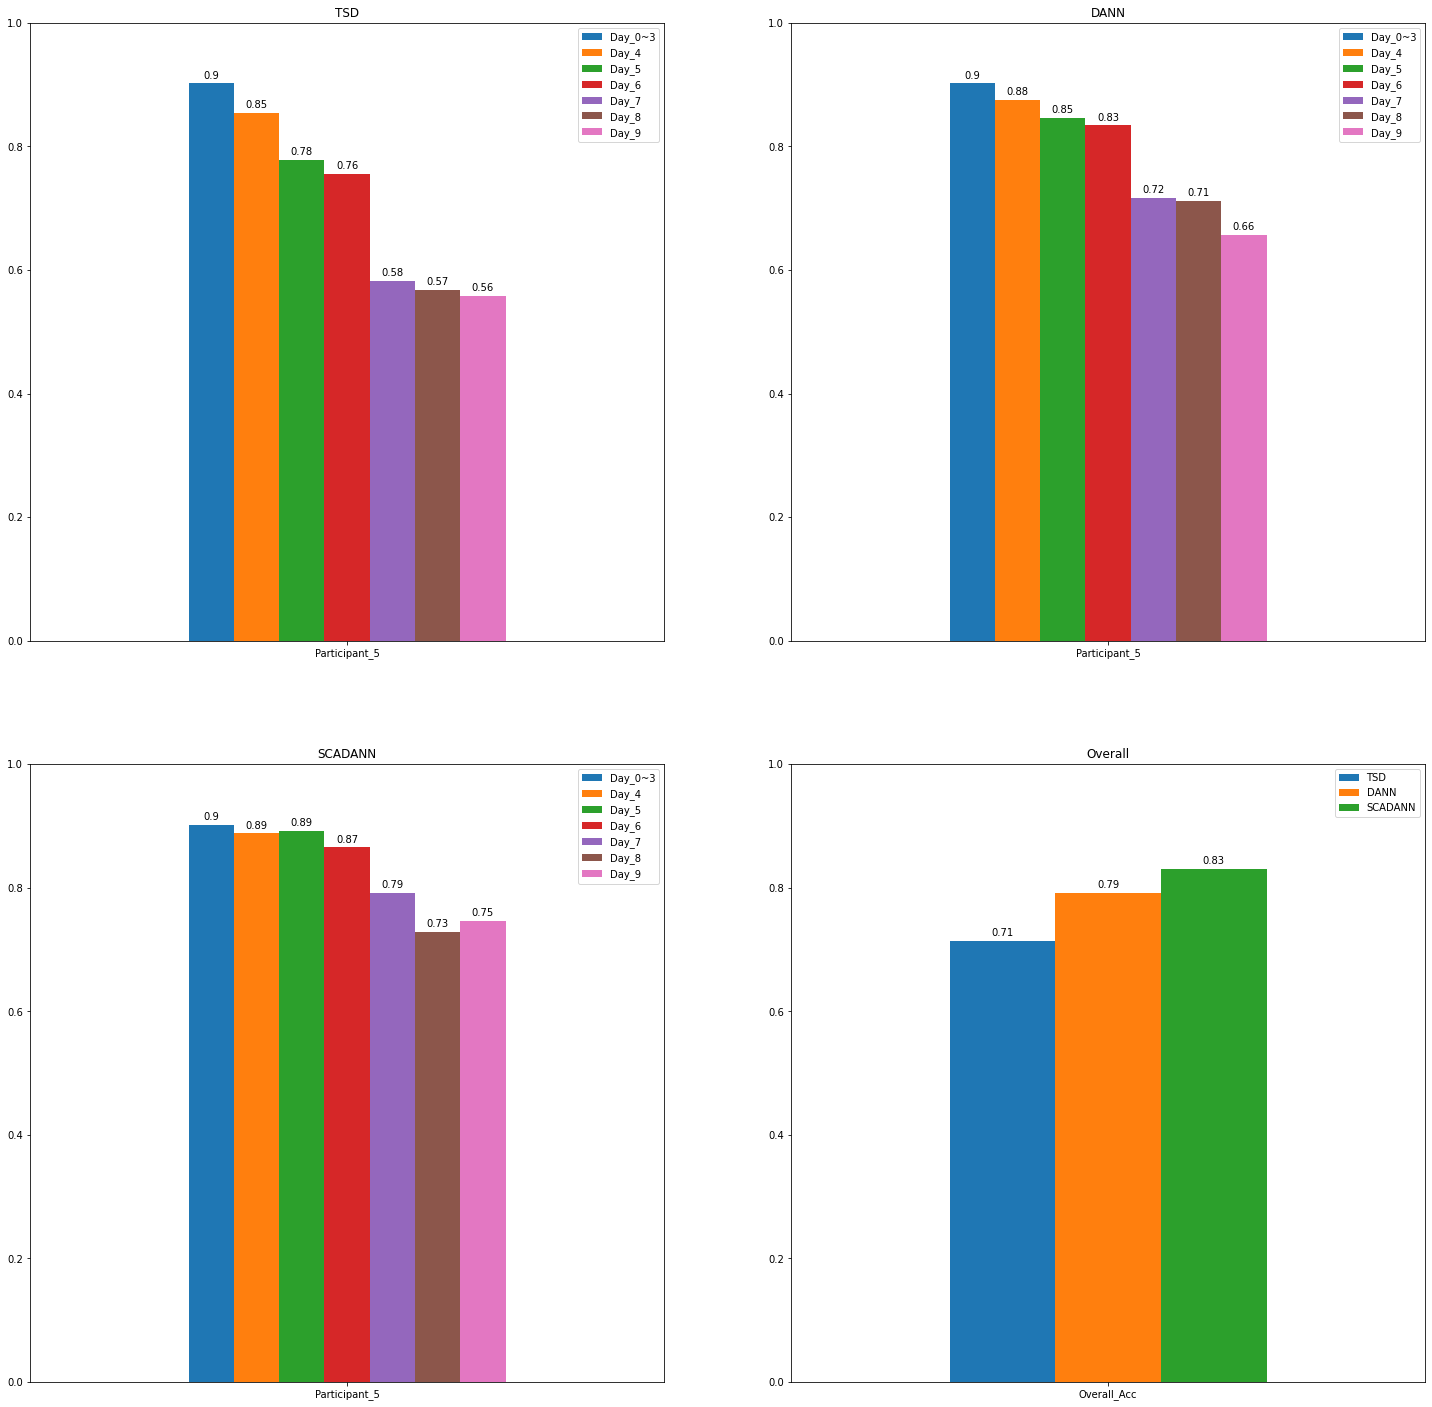

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
acc_list = [TSD_df, DANN_df, SCADANN_df, overall_acc_df]
title_list = ["TSD", "DANN", "SCADANN", "Overall"]
for idx, ax in enumerate(axes.reshape(-1)): 
    acc_list[idx].transpose().plot.bar(ax = ax, rot=0)
    ax.set_title(title_list[idx])
    ax.set_ylim([0, 1.0])
    for p in ax.patches:
        ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8),textcoords='offset points')
